In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle
import os, sys
import scipy.interpolate as intp
import bead_util as bu
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
%matplotlib inline

sys.path.append('../profiles/')
from symmetric_attractor_profile import attractor_profile
sys.path.append('../analysis/')
from holes_analysis import holes_data, holes_analysis

In [6]:
parent = '/home/emmetth/gravity_sim'
os.chdir(parent)
full_path = parent+'/sim_data/blinded_holes_new/'

PS = holes_data(data_dir=full_path)
data = PS.data

In [7]:
non_blinded_path = parent+'/sim_data/non_blinded_holes_new/'
non_blinded = holes_data(data_dir=non_blinded_path)
data1 = non_blinded.data

In [8]:
hrs = sorted(PS.hrs)
edges = sorted(PS.from_edges)

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 7.108e-24  4.545e-24   2.616e-25
Yukawa:
l=1.00um: 2.439e-34  8.244e-36   4.978e-36
l=10.00um: 6.658e-25  1.656e-25   2.730e-26



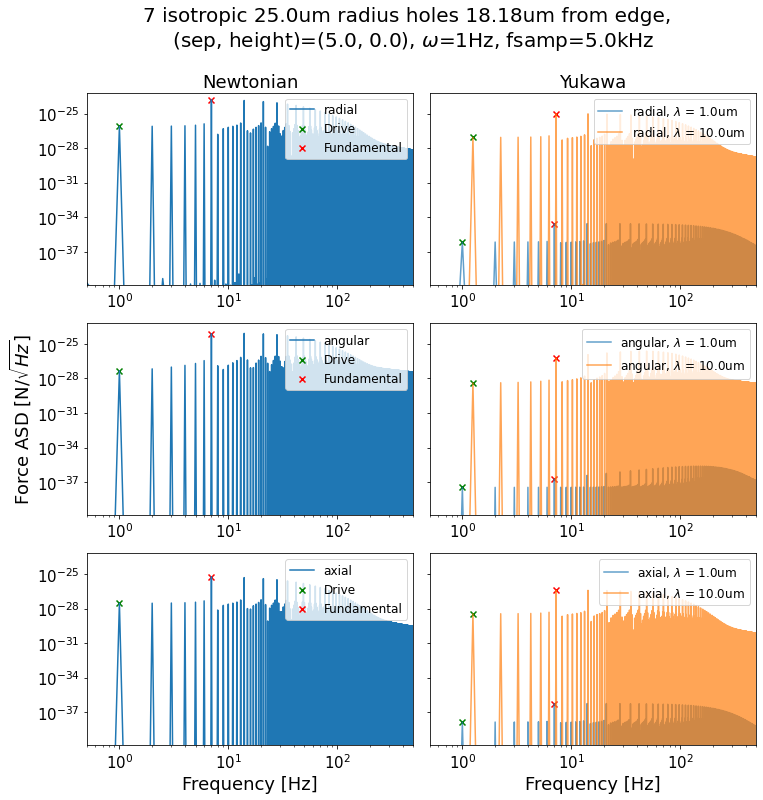

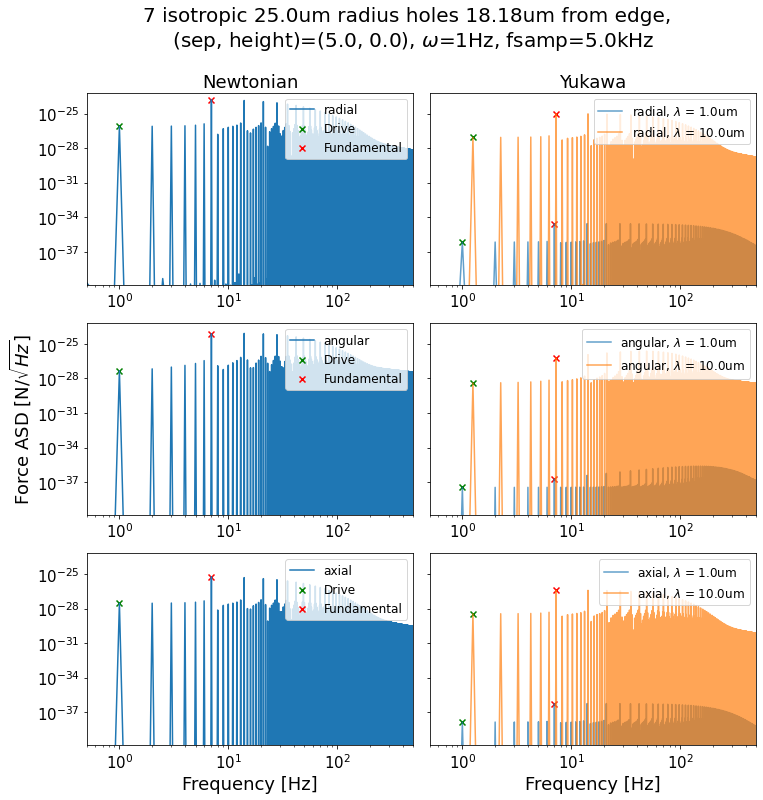

In [9]:
p0 = 7,edges[0],hrs[0],5.0,0.0
blind1 = holes_analysis(data, p0)

blind1.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10, verbose=True)
blind1.plot_asd()

In [10]:
seps = [5.0, 20.0]
heights = [-25.0, -10.0, -5.0, 0.0, 5.0, 10.0, 25.0]

harms_rad = np.zeros((len(seps), len(heights), 3))
norm_harms_rad = np.zeros((len(seps), len(heights), 3))

harms_ax = np.zeros((len(seps), len(heights), 3))
norm_harms_ax = np.zeros((len(seps), len(heights), 3))

edge=18.18
hr=25.0

for i,sep in enumerate(seps):
    for j,height in enumerate(heights):
        p = 7,edge,hr,sep,height
        FM = holes_analysis(data, p)
        FM1 = holes_analysis(data1, p)
        
        harms = FM.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10)
        harms1 = FM1.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10)
        
        harms_rad[i,j,:] = harms[:,0]
        norm_harms_rad[i,j,:] = harms1[:,0]
        
        harms_ax[i,j,:] = harms[:,2]
        norm_harms_ax[i,j,:] = harms1[:,2]

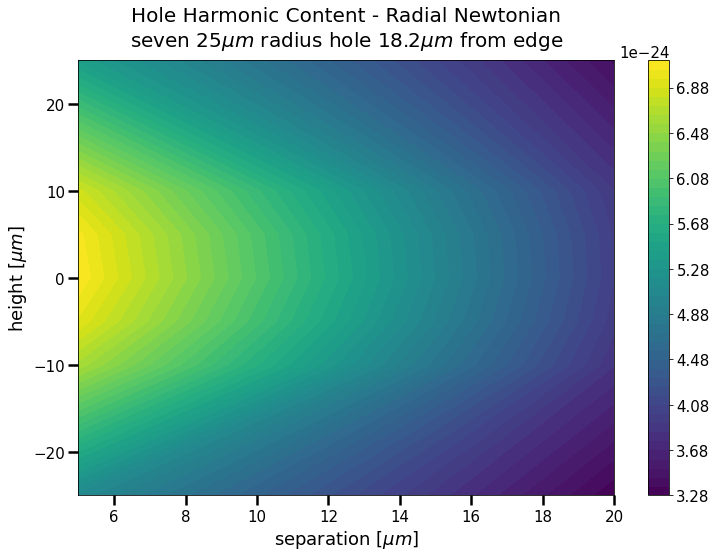

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(seps, heights, harms_rad[:,:,0].T, levels=50)
plt.colorbar()
plt.ylabel('height [$\mu m$]', fontsize=18)
plt.xlabel('separation [$\mu m$]', fontsize=18)
plt.title('Hole Harmonic Content - Radial Newtonian\nseven 25$\mu m$ radius hole 18.2$\mu m$ from edge', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
plt.show()

Idk this looks like how 

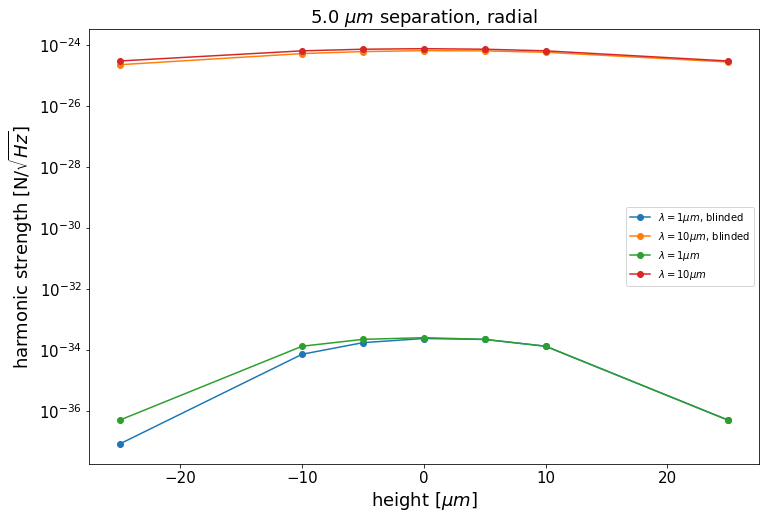

In [18]:
plt.rcParams['figure.figsize'] = (12,8)
for i,sep in enumerate(seps):
    plt.semilogy(heights, harms_rad[i,:,1:], 'o-')
    plt.semilogy(heights, norm_harms_rad[i,:,1:], 'o-')
    plt.legend(['$\lambda=1\mu m$, blinded', '$\lambda=10\mu m$, blinded', '$\lambda=1\mu m$', '$\lambda=10\mu m$'])
    plt.xlabel('height [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.title(f'{sep} $\mu m$ separation, radial', fontsize=18, y=1)
    # plt.savefig('5um_radial.png', dpi=150)
    plt.show()

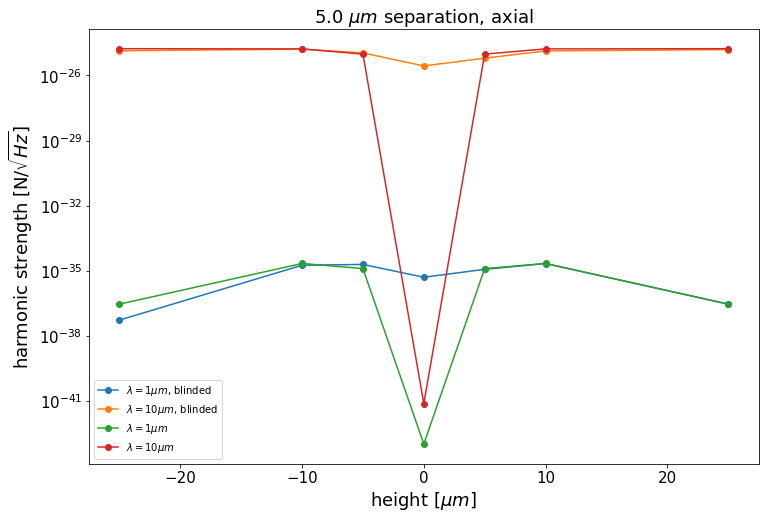

In [17]:
plt.rcParams['figure.figsize'] = (12,8)
for i,sep in enumerate(seps):
    plt.semilogy(heights, harms_ax[i,:,1:], 'o-')
    plt.semilogy(heights, norm_harms_ax[i,:,1:], 'o-')
    plt.legend(['$\lambda=1\mu m$, blinded', '$\lambda=10\mu m$, blinded', '$\lambda=1\mu m$', '$\lambda=10\mu m$'])
    plt.xlabel('height [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.title(f'{sep} $\mu m$ separation, axial', fontsize=18, y=1)
    # plt.savefig('5um_axial.png', dpi=150)
    plt.show()